In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import heapq
from math import log
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Input,Dense,Reshape,Flatten,Concatenate,Conv1D,MaxPool1D,Dropout,BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.metrics import r2_score,mean_squared_error,precision_score,recall_score,f1_score,accuracy_score,roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
from keras.layers import Activation
import os
import time
import json
import pickle
import random
import math
from decimal import Decimal
import matplotlib.mlab as mlab
from scipy import stats
from pylab import rcParams
from sklearn.utils import check_random_state
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from keras.callbacks import EarlyStopping
import SSA as SSA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Core layers
from keras.layers import Activation, Dropout, Flatten, Dense, Input, LeakyReLU

# Normalization layers
from keras.layers import BatchNormalization

# Merge layers
from keras.layers import concatenate, multiply

# Embedding Layers
from keras.layers import Embedding

# Keras models
from keras.models import Model, Sequential

# Keras optimizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [3]:
X = pd.read_excel('X - 副本 (3).xlsx')
y = pd.read_excel('y - 副本 (3).xlsx')

X_test = pd.read_excel('X_test.xlsx')
y_test = pd.read_excel('y_test.xlsx')

In [4]:
X_train=X.iloc[:,1:]
y_train=y.iloc[:,-1]
X_test=X_test.iloc[:,1:]
y_test=y_test.iloc[:,-1]

In [5]:
AM=0
IM=0
SS=0
SS_IM=0
for i in range(len(y_train)):
    if y_train[i]==0:
        AM=AM+1
    elif y_train[i]==1:
        IM=IM+1
    elif y_train[i]==2:
        SS=SS+1
    else:
        SS_IM=SS_IM+1
AM,IM,SS,SS_IM

(248, 303, 213, 282)

In [6]:
sc3 = MinMaxScaler()
X_train = sc3.fit_transform(X_train)
X_test = sc3.transform(X_test)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier 
def fun4(X):
    
    #训练GradientBoostingClassifier 
    
    N_estimators4= int(X[0])
    Learning_rate4=X[1]
    Subsample = X[2]
    Max_depth4=int(X[3])
#     Min_samples_leaf=int(X[2])
#     n_features= train_wine.shape[1]#特征数
    Model=GradientBoostingClassifier(n_estimators=N_estimators4,learning_rate=Learning_rate4,
                                     subsample=Subsample,max_depth=Max_depth4,random_state=41)
    Model.fit(X_train, y_train)#训练
    tra_label=Model.predict(X_train) #训练集预测
    tes_label=Model.predict(X_test) #测试集预测
    output = 2 - accuracy_score(y_test,tes_label) - accuracy_score(y_train,tra_label)#计算错误率，如果错误率越小，结果越优 
    return output
#设置麻雀参数
pop = 20 #种群数量
MaxIter =30 #最大迭代次数
dim = 4 #维度
lb = np.matrix([[10],[0.1],[0.1],[3]]) #下边界
ub = np.matrix([[60],[1],[1],[15]])#上边界
fobj = fun4
GbestScore,GbestPositon,Curve = SSA.SSA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)

print('N_estimators4最优解：',int(GbestPositon[0,0]))
print('Learning_rate4最优解：',GbestPositon[0,1])
print('Subsample最优解：',GbestPositon[0,2])
print('Max_depth4最优解：',int(GbestPositon[0,3]))


N_estimators4= int(GbestPositon[0,0])
Learning_rate4=GbestPositon[0,1]
Subsample = GbestPositon[0,2]
Max_depth4=int(GbestPositon[0,3])
# n_features= train_wine.shape[1]#特征数
Model=GradientBoostingClassifier(n_estimators=N_estimators4,learning_rate=Learning_rate4,
                                 subsample=Subsample,max_depth=Max_depth4,random_state=41)
Model.fit(X_train, y_train)#训练
tra_GBSSA=Model.predict(X_train) #训练集预测
tes_GBSSA=Model.predict(X_test) #测试集预测
print("SSA-GB训练集准确率：", accuracy_score(y_train,tra_GBSSA) )
print("SSA-GB测试集准确率：", accuracy_score(y_test,tes_GBSSA) )
# 分类报告
print(classification_report(y_test,tes_GBSSA))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
print(tes_GBSSA)

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
最优适应度值： [0.07625738]
N_estimators4最优解： 39
Learning_rate4最优解： 0.4795148924154238
Subsample最优解： 0.4795148924154238
Max_depth4最优解： 13
SSA-GB训练集准确率： 0.9933078393881453
SSA-GB测试集准确率： 0.9304347826086956
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.96      0.98        45
           2       0.76      0.89      0.82        18
           3       0.94      0.89      0.91        35

    accuracy                           0.93       115
   macro avg       0.91      0.93      0.92       115
weighted avg       0.94      0.93      0.93       115

[3 1 0 1 0 1 1 0 1 1 1 3 1 1 3 2 1 3 3 1 3 3 0 0 2 3 0 2 1 2 2 3 0 1 1 2 3
 1 1 3 1 0 1 1 3 0 2 1 1 1 1 1 2 2 3 0 2 3 3 3 0 3 3 3 2 1 0 3 0 3 1 3 1 2
 1 1 1 3 3 2 0 3 1

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")

recall_score_average_weighted = recall_score(tes_GBSSA,y_test, average='weighted')

print('recall_score_average_weighted = ', recall_score_average_weighted)
print("----------------------------- precision（精确率）-----------------------------")

precision_score_average_weighted = precision_score(tes_GBSSA,y_test, average='weighted')

print('precision_score_average_weighted = ', precision_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")

f1_score_average_weighted = f1_score(tes_GBSSA,y_test, average='weighted')

print('f1_score_average_weighted = ', f1_score_average_weighted)




----------------------------- recall（召回率）-----------------------------
recall_score_average_weighted =  0.9304347826086956
----------------------------- precision（精确率）-----------------------------
precision_score_average_weighted =  0.9302967563837129


----------------------------- F1-value-----------------------------
f1_score_average_weighted =  0.9289343137680732


In [8]:
import xgboost as xgb
def fun3(X):
    
    #训练XGBClassifier
    
    Learning_rate3= X[0]#随机森林个数
    Max_depth3=int(X[1])
    Gamma3 = X[2]#最大特征数
    N_estimators3=int(X[3])
    
#     Min_samples_leaf=int(X[2])
#     n_features= train_wine.shape[1]#特征数
    Model3=xgb.XGBClassifier(objective='multi:softproba', n_estimators=N_estimators3,max_depth=Max_depth3, 
                            learning_rate=Learning_rate3,gamma=Gamma3,random_state=41)
 
    Model3.fit(X_train, y_train)#训练
    tra_label=Model3.predict(X_train) #训练集预测
    tes_label=Model3.predict(X_test) #测试集预测
    output = 2 - accuracy_score(y_test,tes_label) - accuracy_score(y_train,tra_label)#计算错误率，如果错误率越小，结果越优 
    return output
#设置麻雀参数
pop = 20 #种群数量
MaxIter = 30 #最大迭代次数
dim = 4 #维度
lb = np.matrix([[0.1],[1],[0.1],[10]]) #下边界
ub = np.matrix([[1],[60],[1],[300]])#上边界
fobj = fun3
GbestScore,GbestPositon,Curve = SSA.SSA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)

Learning_rate3= GbestPositon[0,0]
Max_depth3=int(GbestPositon[0,1])#最大特征数
Gamma3=GbestPositon[0,2]
N_estimators3=int(GbestPositon[0,3])
# n_features= train_wine.shape[1]#特征数
print('最优适应度值：',GbestScore)
print('Learning_rate3最优解：',GbestPositon[0,0])
print('Max_depth3最优解：',int(GbestPositon[0,1]))
print('Gamma3 最优解：',GbestPositon[0,2])
print('N_estimators3最优解：',int(GbestPositon[0,3]))
Model3=xgb.XGBClassifier(objective='multi:softproba', n_estimators=N_estimators3,max_depth=Max_depth3, 
                        learning_rate=Learning_rate3,gamma=Gamma3,random_state=41)
Model3.fit(X_train, y_train)#训练
tra_labelSSA=Model3.predict(X_train) #训练集预测
tes_labelSSA=Model3.predict(X_test) #测试集预测
print("SSA-XGB训练集准确率：", accuracy_score(y_train,tra_labelSSA) )
print("SSA-XGB测试集准确率：", accuracy_score(y_test,tes_labelSSA) )
# 分类报告
print(classification_report(y_test,tes_labelSSA))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
print(tes_labelSSA)

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
最优适应度值： [0.09250977]
最优适应度值： [0.09250977]
Learning_rate3最优解： 0.45324351572475347
Max_depth3最优解： 2
Gamma3 最优解： 0.4531957090566827
N_estimators3最优解： 116
SSA-XGB训练集准确率： 0.9770554493307839
SSA-XGB测试集准确率： 0.9304347826086956
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.96      0.98        45
           2       0.77      0.94      0.85        18
           3       0.97      0.86      0.91        35

    accuracy                           0.93       115
   macro avg       0.91      0.94      0.92       115
weighted avg       0.94      0.93      0.93       115

[3 1 0 1 0 1 1 0 1 1 1 3 1 1 2 2 1 3 3 1 3 3 0 0 2 3 0 2 1 3 2 3 0 1 1 2 3
 1 1 2 1 0 1 1 3 0 2 1 1 1 1 1 2 2 2 0 2 2 3 3 0 3 3 3 2 1 0 3 0 3 1 3 

In [26]:
print("\n\n----------------------------- recall（召回率）-----------------------------")

recall_score_average_weighted = recall_score(tes_labelSSA,y_test, average='weighted')

print('recall_score_average_weighted = ', recall_score_average_weighted)
print("----------------------------- precision（精确率）-----------------------------")

precision_score_average_weighted = precision_score(tes_labelSSA,y_test, average='weighted')

print('precision_score_average_weighted = ', precision_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")

f1_score_average_weighted = f1_score(tes_labelSSA,y_test, average='weighted')

print('f1_score_average_weighted = ', f1_score_average_weighted)




----------------------------- recall（召回率）-----------------------------
recall_score_average_weighted =  0.9304347826086956
----------------------------- precision（精确率）-----------------------------
precision_score_average_weighted =  0.9342443064182195


----------------------------- F1-value-----------------------------
f1_score_average_weighted =  0.9291216512955642


In [20]:
from sklearn.linear_model import LogisticRegression
def fun10(X):
    
    #训练GradientBoostingClassifier 
    
    c10= X[0]
    


    
    Model10=LogisticRegression(random_state=0, C=c10,max_iter=1000,solver='sag')

    Model10.fit(X_train, y_train)#训练
    tra_label=Model10.predict(X_train) #训练集预测
    tes_label=Model10.predict(X_test) #测试集预测
    output = 2 - accuracy_score(y_test,tes_label) - accuracy_score(y_train,tra_label)#计算错误率，如果错误率越小，结果越优 
    return output
#设置麻雀参数
pop = 20 #种群数量
MaxIter = 30 #最大迭代次数
dim =1 #维度
lb = np.matrix([[0.01]]) #下边界
ub = np.matrix([[2]])#上边界
fobj = fun10
GbestScore,GbestPositon,Curve = SSA.SSA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)

print('c10最优解：',GbestPositon[0,0])
#print('Gamma9最优解：',GbestPositon[0,1])

c10= GbestPositon[0,0]
#Gamma9=GbestPositon[0,1]
# n_features= train_wine.shape[1]#特征数
Model10=LogisticRegression(random_state=0, C=c10,max_iter=1000,solver='newton-cg')


Model10.fit(X_train, y_train)#训练
tra_LRSSA=Model10.predict(X_train) #训练集预测
tes_LRSSA=Model10.predict(X_test) #测试集预测
print("SSA-LR训练集准确率：", accuracy_score(y_train,tra_LRSSA) )
print("SSA-LR集准确率：", accuracy_score(y_test,tes_LRSSA) )
# 分类报告
print(classification_report(y_test,tes_LRSSA))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
print(tes_LRSSA)

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
最优适应度值： [0.30069831]
c10最优解： 2.0
SSA-LR训练集准确率： 0.8384321223709369
SSA-LR集准确率： 0.8608695652173913
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.98      0.99        45
           2       0.70      0.39      0.50        18
           3       0.74      0.89      0.81        35

    accuracy                           0.86       115
   macro avg       0.83      0.81      0.81       115
weighted avg       0.86      0.86      0.85       115

[3 1 0 1 0 1 1 0 1 1 1 3 0 1 3 3 1 3 3 1 3 3 0 0 3 3 0 1 1 3 3 3 0 1 1 3 3
 1 1 3 1 0 1 1 3 0 2 1 1 1 1 1 2 3 3 1 3 3 3 3 0 3 3 3 3 1 0 3 0 3 1 3 1 3
 1 1 1 2 3 2 0 3 1 3 2 1 2 3 0 3 1 1 0 3 2 3 1 3 3 1 1 2 3 1 1 0 1 3 1 1 0
 2 0 2 1]


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")

recall_score_average_weighted = recall_score(tes_LRSSA,y_test, average='weighted')

print('recall_score_average_weighted = ', recall_score_average_weighted)
print("----------------------------- precision（精确率）-----------------------------")

precision_score_average_weighted = precision_score(tes_LRSSA,y_test, average='weighted')

print('precision_score_average_weighted = ', precision_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")

f1_score_average_weighted = f1_score(tes_LRSSA,y_test, average='weighted')

print('f1_score_average_weighted = ', f1_score_average_weighted)




----------------------------- recall（召回率）-----------------------------
recall_score_average_weighted =  0.8608695652173913
----------------------------- precision（精确率）-----------------------------
precision_score_average_weighted =  0.8966183574879227


----------------------------- F1-value-----------------------------
f1_score_average_weighted =  0.8718977760013421


In [10]:
n_features=12
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree  
def fun7(X):
    
    #训练DecisionTreeClassifie
    Max_depth7 = int(X[0]) #随机森林个数
    Max_features7=int(X[1])

    n_features= 12 #特征数
    Model7 = DecisionTreeClassifier(max_depth=Max_depth7,max_features=Max_features7,
                                   criterion='gini',random_state=21)
    Model7.fit(X_train, y_train)#训练
    tra_label=Model7.predict(X_train) #训练集预测
    tes_label=Model7.predict(X_test) #测试集预测
    output = 2 - accuracy_score(y_test,tes_label) - accuracy_score(y_train,tra_label)#计算错误率，如果错误率越小，结果越优 
    return output
#设置麻雀参数
pop = 20 #种群数量
MaxIter = 40 #最大迭代次数
dim = 2 #维度
lb = np.matrix([[3],[1]]) #下边界
ub = np.matrix([[20],[n_features]])#上边界
fobj = fun7
GbestScore,GbestPositon,Curve = SSA.SSA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('Max_depth7最优解：',int(GbestPositon[0,0]))
print('Max_features7最优解：',int(GbestPositon[0,1]))
#利用最终优化的结果计算分类正确率等信息
#利用最优参数训练随机森林
Max_depth7= int(GbestPositon[0,0]) #随机森林个数
Max_features7 = int(GbestPositon[0,1])   
Model7 = DecisionTreeClassifier(max_depth=Max_depth7,max_features=Max_features7,criterion='gini',random_state=21)
Model7.fit(X_train, y_train)
tra_DTSSA=Model7.predict(X_train) #训练集预测
tes_DTSSA=Model7.predict(X_test) #测试集预测
print("SSA-DT训练集准确率：", accuracy_score(y_train,tra_DTSSA) )
print("SSA-DT测试集准确率：", accuracy_score(y_test,tes_DTSSA) )
# 分类报告
print(classification_report(y_test,tes_DTSSA))
#设置显示窗口数据显示别全是...
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
print(tes_DTSSA)


第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
第30次迭代
第31次迭代
第32次迭代
第33次迭代
第34次迭代
第35次迭代
第36次迭代
第37次迭代
第38次迭代
第39次迭代
最优适应度值： [0.11495552]
Max_depth7最优解： 17
Max_features7最优解： 3
SSA-DT训练集准确率： 0.9980879541108987
SSA-DT测试集准确率： 0.8869565217391304
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.96      0.98      0.97        45
           2       0.70      0.78      0.74        18
           3       0.91      0.83      0.87        35

    accuracy                           0.89       115
   macro avg       0.86      0.87      0.86       115
weighted avg       0.89      0.89      0.89       115

[3 1 0 1 0 1 1 0 1 1 1 3 1 1 3 2 1 3 3 1 3 3 0 0 2 3 0 2 1 3 2 2 1 1 1 2 3
 1 1 3 1 0 1 1 3 0 2 1 1 1 1 1 3 0 3 1 2 3 3 3 0 2 3 3 2 1 0 3 0 2 1 3 1 2
 1 1 1 3 3 2 0 3 1 2

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")
recall_score_average_None = recall_score(tes_DTSSA,y_test, average=None)
recall_score_average_micro = recall_score(tes_DTSSA,y_test, average='micro')
recall_score_average_macro = recall_score(tes_DTSSA,y_test, average='macro')
recall_score_average_weighted = recall_score(tes_DTSSA,y_test, average='weighted')
print('recall_score_average_None = ', recall_score_average_None)
print('recall_score_average_micro = ', recall_score_average_micro)
print('recall_score_average_macro = ', recall_score_average_macro)
print('recall_score_average_weighted = ', recall_score_average_weighted)
print("----------------------------- precision（精确率）-----------------------------")
precision_score_average_None = precision_score(tes_DTSSA,y_test, average=None)
precision_score_average_micro = precision_score(tes_DTSSA,y_test, average='micro')
precision_score_average_macro = precision_score(tes_DTSSA,y_test, average='macro')
precision_score_average_weighted = precision_score(tes_DTSSA,y_test, average='weighted')
print('precision_score_average_None = ', precision_score_average_None)
print('precision_score_average_micro = ', precision_score_average_micro)
print('precision_score_average_macro = ', precision_score_average_macro)
print('precision_score_average_weighted = ', precision_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")
f1_score_average_None = f1_score(tes_DTSSA,y_test, average=None)
f1_score_average_micro = f1_score(tes_DTSSA,y_test, average='micro')
f1_score_average_macro = f1_score(tes_DTSSA,y_test, average='macro')
f1_score_average_weighted = f1_score(tes_DTSSA,y_test, average='weighted')
print('f1_score_average_None = ', f1_score_average_None)
print('f1_score_average_micro = ', f1_score_average_micro)
print('f1_score_average_macro = ', f1_score_average_macro)
print('f1_score_average_weighted = ', f1_score_average_weighted)




----------------------------- recall（召回率）-----------------------------
recall_score_average_None =  [0.88235294 0.95652174 0.7        0.90625   ]
recall_score_average_micro =  0.8869565217391304
recall_score_average_macro =  0.8612811700767263
recall_score_average_weighted =  0.8869565217391304
----------------------------- precision（精确率）-----------------------------
precision_score_average_None =  [0.88235294 0.97777778 0.77777778 0.82857143]
precision_score_average_micro =  0.8869565217391304
precision_score_average_macro =  0.8666199813258637
precision_score_average_weighted =  0.8873706004140787


----------------------------- F1-value-----------------------------
f1_score_average_None =  [0.88235294 0.96703297 0.73684211 0.86567164]
f1_score_average_micro =  0.8869565217391304
f1_score_average_macro =  0.8629749138159101
f1_score_average_weighted =  0.8862769663138527


In [11]:
import numpy as np
 
 
def py_intersect(string_1, string_2):
    """
    :param string_1: 字符串
    :param string_2: 字符串
    :return: 两字符串的交集
    """
    result = ''
    for char in string_1:
        if char in string_2 and char not in result:
            result += char
    return result
 
 
def dempster(mp1, mp2, P):
    """
    :param mp1: 证据源1，numpy数组，存储信度
    :param mp2: 证据源2，numpy数组，存储信度
    :param P: 辨识框架
    :return: 返回融合信度和冲突因子
    """
    l = len(P)  # 幂集长度，这里指恐怖分子数目
    mp = np.zeros((1, l), 'float64')  # 初始化最终结果mp
    k_matrix = np.zeros((l, l))  # 冲突因子乘子
    for k in range(l):
        tmp = P[k]
        f_matrix = np.zeros((l, l))  # 融合乘子
        for i in range(l):
            for j in range(l):
                tmp_ij = py_intersect(P[i], P[j])  # 有无交集
                if not tmp_ij:  # 若空集
                    k_matrix[i][j] = 1
                if tmp_ij == tmp:  # 若交集等于P[k]
                    f_matrix[i][j] = 1
        mp[0][k] = sum(sum(np.dot(mp1.T, mp2) * f_matrix))
    k = sum(sum(np.dot(mp1.T, mp2) * k_matrix))
    mp = mp / (1 - k)
    return mp, k
 


In [44]:
import sklearn
def GaussianNB_classifier(X_train, y_train):  
    from sklearn.naive_bayes import GaussianNB
    clf=GaussianNB()
    clf.fit(X_train, y_train)
    return clf  

def lr_classifier(X_train, y_train):  
    clf=LogisticRegression(random_state=0, C=c10,max_iter=1000,solver='newton-cg')
    clf.fit(X_train, y_train)
    return clf  

# Decision Tree Classifier  
def decision_tree_classifier(X_train, y_train):  
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import tree  
    clf=DecisionTreeClassifier(max_depth=Max_depth7,max_features=Max_features7,
                                   criterion='gini',random_state=21)
    clf.fit(X_train, y_train)
    return clf  
def svc_classifier(X_train, y_train):   
    clf =SVC(kernel="rbf",C = c9,probability=True,random_state=42)
    clf.fit(X_train, y_train)
    return clf
def rf_classifier(X_train, y_train):  
    clf=RandomForestClassifier(n_estimators=N_estimators1,max_features=Max_features1, max_depth=Max_depth1,
                                   min_samples_split=Min_samples_split1, bootstrap=True,random_state=40) #定义模型
    clf.fit(X_train, y_train)
    return clf
 
    
    
def xgb_classifier(X_train, y_train):   
    clf=xgb.XGBClassifier(objective='multi:softproba', n_estimators=N_estimators3,max_depth=Max_depth3, 
                            learning_rate=Learning_rate3,gamma=Gamma3,random_state=41)
    clf.fit(X_train, y_train)
    return clf



def GB_classifier(X_train, y_train):  
    clf=GradientBoostingClassifier(n_estimators=N_estimators4,learning_rate=Learning_rate4,
                                 subsample=Subsample,max_depth=Max_depth4,random_state=41)
    clf.fit(X_train, y_train)
    return clf



if __name__ == '__main__':
    clf_save_file = None
    clf_save = {}
    grid_num = 463
    test_classifiers = ['LR','DT','XGB','GB']  
    classifiers = {#'GNB':GaussianNB_classifier,
                  'LR':lr_classifier,
                   'DT':decision_tree_classifier,
                 # 'SVC':svc_classifier,
                    #'LGB':lightgbm_classifier, 
                'XGB':xgb_classifier,
                # 'RF':rf_classifier,
                 'GB':GB_classifier,
                   #'KNN':KNN_classifier,
                  # 'BG':bg_classifier,
                
    }
      
    print ('reading training and testing data...') 
    num_train, num_feat_tomek = X_train.shape 
    num_test, num_feat = X_test.shape  
    is_binary_class = (len(np.unique(y_train)) == 463)  
    print ('******************** Data Info *********************')  
    print (' #training data: %d #testing_data: %d, dimension: %d' % (num_train, num_test, num_feat))
predict_total2=[]
rmse_total=[]
predict_proba2=[]
for classifier in test_classifiers:  
    print ('******************* %s ********************' % classifier)
    start_time = time.time()  
    clf = classifiers[classifier](X_train, y_train) 
    print ('training took %fs!' % (time.time() - start_time)  )
    predict = clf.predict(X_test)
    predict_proba = clf.predict_proba(X_test)
    if clf_save_file != None:  
        clf_save[classifier] = clf  
    if is_binary_class:  
        precision = metrics.precision_score(y_test, predict, average='micro')  
        recall = metrics.recall_score(y_test, predict, average='micro')
        tmp = func_rmse(predict,y_test)
        rmse_total.append(tmp)
        print ('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))  
    accuracy = sklearn.metrics.accuracy_score(y_test, predict)  
    print ('accuracy: %.2f%%' % (100 * accuracy) ) 
    print(classification_report(y_test, predict))
    predict_total2.append(predict)
    predict_proba2.append(predict_proba)
predict_total1 = np.array(predict_total2)
predict_total = predict_total1.transpose()
predict_proba1 = np.array(predict_proba2)
predict_proba = predict_proba1.transpose()
print(predict_total)
print(predict_total.shape)

print(predict_proba)
print(predict_proba.shape)

reading training and testing data...
******************** Data Info *********************
 #training data: 1046 #testing_data: 115, dimension: 12
******************* LR ********************
training took 0.016077s!
accuracy: 86.09%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.98      0.99        45
           2       0.70      0.39      0.50        18
           3       0.74      0.89      0.81        35

    accuracy                           0.86       115
   macro avg       0.83      0.81      0.81       115
weighted avg       0.86      0.86      0.85       115

******************* DT ********************
training took 0.002998s!
accuracy: 88.70%
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.96      0.98      0.97        45
           2       0.70      0.78      0.74        18
           3       0.91      0

In [45]:
np.column_stack((predict_total,y_test))

array([[3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [3, 3, 3, 3, 3],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [3, 3, 2, 3, 3],
       [3, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [3, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [0, 0, 0, 0, 0],
       [1, 2, 2, 2, 1],
       [1, 1, 1, 1, 1],
       [3, 3, 3, 2, 3],
       [3, 2, 2, 2, 2],
       [3, 2, 3, 3, 3],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [3, 2, 2, 2, 3],
       [3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [3, 3, 2, 3, 2],
       [1, 1, 1, 1, 1],
       [0, 0, 0,

In [22]:
    import scipy
    list = []
    b = ['GB','RF','BG','DD']
    len_sf = len(b) 
    d = np.zeros(len_sf)
    a = np.zeros([4,4])
    for k in range(115):
        a=predict_proba[::, k] 
        print(a)
        for i in range(len_sf):
            p=a[:,i]
            c = np.mean(p)   
            d[i]=np.linalg.norm(np.sqrt(p)-np.sqrt(c))
        print('d:',d)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(1/d[i])/sum(1/d)
            #crd为证据的可信度 
        print('crd:',crd)
        #a[a<0.00003] = 1e-12
        BJS = np.zeros([len_sf,len_sf])
        for i in range(len_sf):
            for j in range(len_sf):
                p=a[:,i]
                q=a[:,j]
                M = (p + q)/2
                BJS[i,j]=0.5*scipy.stats.entropy(p, M, base=2)+0.5*scipy.stats.entropy(q, M, base=2)
        print('BJS:',BJS)
        BJSS= np.zeros(len_sf) 
        for i in range(len_sf):
            BJSS[i]=sum((BJS[i,:])-BJS[i,i])/3
        sup1 = np.zeros(len_sf)
        for i in range(len_sf):
            sup1[i]=1/BJSS[i]
        crd1 = np.zeros(len_sf)
        for i in range(len_sf):
            crd1[i]=float(sup1[i])/sum(sup1)
        
        Acrd = np.zeros(len_sf)
       
        Acrd = np.multiply(crd,crd1)
        print('Acrd:',Acrd)
        Acrdd = np.zeros(len_sf)
        for i in range(len_sf):
            Acrdd[i]=float(Acrd[i])/sum(Acrd)
        A=np.zeros(4)
        for j in range(4):
            A[j] = sum(np.multiply(a[j,:],Acrdd))
            # 加权平均证据WAE
        
        AA = A
        print('AA:',AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        print(m1,m2)
        P = ['A', 'B', 'C','D'] 
        mp, k = dempster(m1, m2, P)
        #print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        #print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        mp3, k = dempster(mp2, m2, P)
        mp4, k = dempster(mp3, m2, P)
        mp5, k = dempster(mp4, m2, P)
        print(f'融合后信度为{mp2}')
        print(f'冲突因子k = {k}')
        pre_dsjq=[]
        pre_grid = np.argmax(mp2)#返回最大值的位置
        pre_dsjq.append(pre_grid)
        list.append(pre_grid)
        y_pre=np.array(list)
        print(y_pre,y_pre.shape)
y_pre111=y_pre.tolist()
#print(type(y_pre1),y_pre
accuracy = sklearn.metrics.accuracy_score(y_test,y_pre111)
print('accuracy: %.2f%%' % (100 * accuracy))  

[[7.75112397e-02 0.00000000e+00 9.68568120e-03 4.54358806e-08]
 [8.31546459e-02 0.00000000e+00 3.15625630e-02 1.04437462e-07]
 [2.36506828e-01 0.00000000e+00 3.03529799e-01 7.21804718e-06]
 [6.02827286e-01 1.00000000e+00 6.55221999e-01 9.99992632e-01]]
d: [0.41290061 1.         0.60293649 0.99838906]
crd: [0.39820274 0.16441816 0.27269565 0.16468345]
BJS: [[0.00000000e+00 2.34455436e-01 3.41329468e-02 2.34397000e-01]
 [2.34455436e-01 0.00000000e+00 1.98481898e-01 3.68397005e-06]
 [3.41329468e-02 1.98481898e-01 0.00000000e+00 1.98422475e-01]
 [2.34397000e-01 3.68397005e-06 1.98422475e-01 0.00000000e+00]]
Acrd: [0.0886706  0.04253552 0.07085885 0.04261576]
AA: [0.03089449 0.03927511 0.17361106 0.75621935]
[[0.03089449 0.03927511 0.17361106 0.75621935]] [[0.03089449 0.03927511 0.17361106 0.75621935]]
融合后信度为[[2.77794641e-06 7.25553769e-06 2.77018885e-03 9.97219890e-01]]
冲突因子k = 0.2438660286085544
[3] (1,)
[[3.97466603e-03 0.00000000e+00 5.36970282e-03 7.91030569e-24]
 [9.75386561e-01 1.000

d: [0.63203497 1.         0.41691499 0.94947031]
crd: [0.26221347 0.16572809 0.3975105  0.17454794]
BJS: [[0.         0.14365941 0.10426626 0.13138332]
 [0.14365941 0.         0.42077168 0.00421479]
 [0.10426626 0.42077168 0.         0.40179393]
 [0.13138332 0.00421479 0.40179393 0.        ]]
Acrd: [0.09424934 0.03973477 0.05847418 0.0442833 ]
AA: [0.0365642  0.01510943 0.20803082 0.74029554]
[[0.0365642  0.01510943 0.20803082 0.74029554]] [[0.0365642  0.01510943 0.20803082 0.74029554]]
融合后信度为[[5.91427472e-06 1.72452675e-07 6.19708977e-03 9.93796769e-01]]
冲突因子k = 0.2599664063615592
[3 1 0 1 0 1 1 0 1 1 1 3 1 1 3 2 1 3 3 1 3 3 0 0 2 3 0 2 1 3 2 3 0 1 1 2 3
 1 1 3 1 0 1 1 3 0 2 1 1 1 1 1 2 2 3] (55,)
[[2.21563050e-01 0.00000000e+00 5.12892306e-01 7.20221714e-01]
 [7.66789588e-01 1.00000000e+00 4.80807662e-01 2.79632429e-01]
 [4.03545863e-03 0.00000000e+00 7.11532892e-04 8.77098656e-08]
 [7.61190286e-03 0.00000000e+00 5.58848213e-03 1.45769356e-04]]
d: [0.70912513 1.         0.69928628 0.

融合后信度为[[3.87557576e-16 9.99999969e-01 7.76923965e-12 6.07666248e-13]]
冲突因子k = 0.0026855181961534746
[3 1 0 1 0 1 1 0 1 1 1 3 1 1 3 2 1 3 3 1 3 3 0 0 2 3 0 2 1 3 2 3 0 1 1 2 3
 1 1 3 1 0 1 1 3 0 2 1 1 1 1 1 2 2 3 1 2 3 3 3 0 3 3 3 2 1 0 3 0 3 1 3 1 2
 1 1 1 3 3 2 0 3 1 2 2 1 2 3 0 3 1 1 0 3 3 2 1 3 3 1 1 2 2 1 1 0 1] (107,)
[[5.02883276e-02 0.00000000e+00 5.12055308e-02 1.00367343e-10]
 [8.94172990e-03 0.00000000e+00 4.35010865e-02 5.90082200e-09]
 [2.33950963e-01 0.00000000e+00 2.86632385e-02 7.86300550e-10]
 [7.06818980e-01 1.00000000e+00 8.76630127e-01 9.99999993e-01]]
d: [0.5973095  1.         0.6779063  0.99994256]
crd: [0.32512263 0.19419883 0.28646855 0.19420999]
BJS: [[0.00000000e+00 1.64844369e-01 8.15326344e-02 1.64844294e-01]
 [1.64844369e-01 0.00000000e+00 6.46122290e-02 3.39374479e-09]
 [8.15326344e-02 6.46122290e-02 0.00000000e+00 6.46121485e-02]
 [1.64844294e-01 3.39374479e-09 6.46121485e-02 0.00000000e+00]]
Acrd: [0.0497474  0.05325309 0.08552512 0.05325619]
AA: [0.02845

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")

recall_score_average_weighted = recall_score(y_pre111,y_test, average='weighted')

print('recall_score_average_weighted = ', recall_score_average_weighted)
print("----------------------------- precision（精确率）-----------------------------")

precision_score_average_weighted = precision_score(y_pre111,y_test, average='weighted')

print('precision_score_average_weighted = ', precision_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")

f1_score_average_weighted = f1_score(y_pre111,y_test, average='weighted')

print('f1_score_average_weighted = ', f1_score_average_weighted)




----------------------------- recall（召回率）-----------------------------
recall_score_average_weighted =  0.9478260869565217
----------------------------- precision（精确率）-----------------------------
precision_score_average_weighted =  0.9477984817115253


----------------------------- F1-value-----------------------------
f1_score_average_weighted =  0.947478231128111


In [29]:
confusion_matrix_result = metrics.confusion_matrix(y_pre111,y_test)
print(confusion_matrix_result)

[[17  0  0  1]
 [ 0 44  0  0]
 [ 0  1 16  2]
 [ 0  0  2 32]]


# 传统DS

In [30]:
    list = []
    pre_dsjq=[]
    pre_ds=[]
    P = ['KNN', 'LR', 'RF', 'DT']
    len_sf = len(P) 
    a = np.zeros([4,4])
    for k in range(115):
        a=predict_proba[::, k]
        w1=a[:,0]
        w2=a[:,1]
        A=np.array([w1])
        B=np.array([w2])
        print(A,B)
        mp, k = dempster(A,B, P)
        C=np.array([a[:,2]])
        D=np.array([a[:,3]])
        mp1, k = dempster(mp,C, P)
        mp2, k = dempster(mp1,D, P)
        print(mp)
        pre_grid = np.argmax(mp2)#返回最大值的位置
        pre_dsjq.append(pre_grid)
        list.append(pre_grid)
        y_pre=np.array(list)
        print(y_pre,y_pre.shape)
y_pre1=y_pre.tolist()
#print(type(y_pre1),y_pre)
accuracy = sklearn.metrics.accuracy_score(y_test,y_pre1)
print('accuracy: %.2f%%' % (100 * accuracy))
#print(classification_report(y_test,y_pre1))

[[0.07751124 0.08315465 0.23650683 0.60282729]] [[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[3] (1,)
[[0.00397467 0.97538656 0.00998069 0.01065809]] [[0. 1. 0. 0.]]
[[0.        0.9898711 0.        0.       ]]
[3 1] (2,)
[[0.88494344 0.11064924 0.00164386 0.00276346]] [[1. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[3 1 0] (3,)
[[0.13956353 0.81182642 0.03106587 0.01754419]] [[0. 1. 0. 0.]]
[[0.         0.96314373 0.         0.        ]]
[3 1 0 1] (4,)
[[0.65897611 0.10332535 0.05300484 0.1846937 ]] [[1. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[3 1 0 1 0] (5,)
[[0.15711197 0.7732574  0.02815949 0.04147115]] [[0. 1. 0. 0.]]
[[0.         0.96486287 0.         0.        ]]
[3 1 0 1 0 1] (6,)
[[0.29327502 0.67779917 0.00988661 0.01903919]] [[0. 1. 0. 0.]]
[[0.         0.98562335 0.         0.        ]]
[3 1 0 1 0 1 1] (7,)
[[0.79557841 0.19123093 0.00699694 0.00619372]] [[1. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[3 1 0 1 0 1 1 0] (8,)
[[0.06533489 0.90963298 0.00404067 0.02099145]] [[0. 1. 0. 0.]]
[[0.         0.99557755 0.         0.       

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")

recall_score_average_weighted = recall_score(y_pre1,y_test, average='weighted')

print('recall_score_average_weighted = ', recall_score_average_weighted)
print("----------------------------- precision（精确率）-----------------------------")

precision_score_average_weighted = precision_score(y_pre1,y_test, average='weighted')

print('precision_score_average_weighted = ', precision_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")

f1_score_average_weighted = f1_score(y_pre1,y_test, average='weighted')

print('f1_score_average_weighted = ', f1_score_average_weighted)




----------------------------- recall（召回率）-----------------------------
recall_score_average_weighted =  0.8782608695652174
----------------------------- precision（精确率）-----------------------------
precision_score_average_weighted =  0.8792270531400965


----------------------------- F1-value-----------------------------
f1_score_average_weighted =  0.8770736509866945


In [32]:
confusion_matrix_result = metrics.confusion_matrix(y_pre1,y_test)
print(confusion_matrix_result)

[[15  0  1  1]
 [ 2 44  0  0]
 [ 0  1 14  6]
 [ 0  0  3 28]]


# 没有优化

In [33]:
import sklearn


def lr_classifier(X_train, y_train):  
    from sklearn.linear_model import LogisticRegression
    clf=LogisticRegression()
    clf.fit(X_train, y_train)
    return clf  

# Decision Tree Classifier  
def decision_tree_classifier(X_train, y_train):  
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import tree  
    clf=DecisionTreeClassifier(criterion='gini',random_state=21)
    clf.fit(X_train, y_train)
    return clf  
def svc_classifier(X_train, y_train):   
    from sklearn.svm import SVC  
    clf =SVC(kernel="rbf",probability=True,random_state=42)
    clf.fit(X_train, y_train)
    return clf
def rf_classifier(X_train, y_train):  
    clf=RandomForestClassifier(bootstrap=True,random_state=40) #定义模型
    clf.fit(X_train, y_train)
    return clf
 
    
    
def xgb_classifier(X_train, y_train):  
    import xgboost as xgb
    clf=xgb.XGBClassifier(objective='multi:softproba',random_state=41)
    clf.fit(X_train, y_train)
    return clf



def GB_classifier(X_train, y_train):  
    from sklearn.ensemble import BaggingClassifier  
    clf=GradientBoostingClassifier(random_state=41)
    clf.fit(X_train, y_train)
    return clf



if __name__ == '__main__':
    clf_save_file = None
    clf_save = {}
    grid_num = 463
    test_classifiers = ['LR','DT','XGB','GB']  
    classifiers = {#'GNB':GaussianNB_classifier,
                  'LR':lr_classifier,
                   'DT':decision_tree_classifier,
                 # 'SVC':svc_classifier,
                    #'LGB':lightgbm_classifier, 
                'XGB':xgb_classifier,
                 #'RF':rf_classifier,
                 'GB':GB_classifier,
                   #'KNN':KNN_classifier,
                  # 'BG':bg_classifier,
                
    }
      
    print ('reading training and testing data...') 
    num_train, num_feat_tomek = X_train.shape 
    num_test, num_feat = X_test.shape  
    is_binary_class = (len(np.unique(y_train)) == 463)  
    print ('******************** Data Info *********************')  
    print (' #training data: %d #testing_data: %d, dimension: %d' % (num_train, num_test, num_feat))
predict_total2=[]
rmse_total=[]
predict_proba2=[]
for classifier in test_classifiers:  
    print ('******************* %s ********************' % classifier)
    start_time = time.time()  
    clf = classifiers[classifier](X_train, y_train) 
    print ('training took %fs!' % (time.time() - start_time)  )
    predict = clf.predict(X_test)
    predict_proba = clf.predict_proba(X_test)
    if clf_save_file != None:  
        clf_save[classifier] = clf  
    if is_binary_class:  
        precision = metrics.precision_score(y_test, predict, average='micro')  
        recall = metrics.recall_score(y_test, predict, average='micro')
        tmp = func_rmse(predict,y_test)
        rmse_total.append(tmp)
        print ('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))  
    accuracy = sklearn.metrics.accuracy_score(y_test, predict)  
    print ('accuracy: %.2f%%' % (100 * accuracy) ) 
    print(classification_report(y_test, predict))
    predict_total2.append(predict)
    predict_proba2.append(predict_proba)
predict_total1 = np.array(predict_total2)
predict_total = predict_total1.transpose()
predict_proba1 = np.array(predict_proba2)
predict_proba = predict_proba1.transpose()
print(predict_total)
print(predict_total.shape)

print(predict_proba)
print(predict_proba.shape)

reading training and testing data...
******************** Data Info *********************
 #training data: 1046 #testing_data: 115, dimension: 12
******************* LR ********************
training took 0.020000s!
accuracy: 84.35%
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.96      0.98        45
           2       0.67      0.33      0.44        18
           3       0.72      0.89      0.79        35

    accuracy                           0.84       115
   macro avg       0.81      0.79      0.78       115
weighted avg       0.84      0.84      0.83       115

******************* DT ********************
training took 0.007004s!
accuracy: 79.13%
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        17
           1       1.00      0.84      0.92        45
           2       0.54      0.72      0.62        18
           3       0.82      0

In [34]:
    import scipy
    list = []
    b = ['GB','RF','BG','DD']
    len_sf = len(b) 
    d = np.zeros(len_sf)
    a = np.zeros([4,4])
    for k in range(115):
        a=predict_proba[::, k] 
        for i in range(len_sf):
            p=a[:,i]
            c = np.mean(p)   
            d[i]=np.linalg.norm(np.sqrt(p)-np.sqrt(c))
        print('d:',d)
        crd = np.zeros(len_sf)
        for i in range(len_sf):
            crd[i]=float(1/d[i])/sum(1/d)
            #crd为证据的可信度 
        print('crd:',crd)
        #a[a<0.00003] = 1e-12
        BJS = np.zeros([len_sf,len_sf])
        for i in range(len_sf):
            for j in range(len_sf):
                p=a[:,i]
                q=a[:,j]
                M = (p + q)/2
                BJS[i,j]=0.5*scipy.stats.entropy(p, M, base=2)+0.5*scipy.stats.entropy(q, M, base=2)
        print('BJS:',BJS)
        BJSS= np.zeros(len_sf) 
        for i in range(len_sf):
            BJSS[i]=sum((BJS[i,:])-BJS[i,i])/3
        sup1 = np.zeros(len_sf)
        for i in range(len_sf):
            sup1[i]=1/BJSS[i]
        crd1 = np.zeros(len_sf)
        for i in range(len_sf):
            crd1[i]=float(sup1[i])/sum(sup1)
        
        Acrd = np.zeros(len_sf)
       
        Acrd = np.multiply(crd,crd1)
        print('Acrd:',Acrd)
        Acrdd = np.zeros(len_sf)
        for i in range(len_sf):
            Acrdd[i]=float(Acrd[i])/sum(Acrd)
        A=np.zeros(4)
        for j in range(4):
            A[j] = sum(np.multiply(a[j,:],Acrdd))
            # 加权平均证据WAE
        
        AA = A
        print('AA:',AA) 
        m1 = np.array([AA])
        m2 = np.array([A])
        print(m1,m2)
        P = ['A', 'B', 'C','D'] 
        mp, k = dempster(m1, m2, P)
        #print(f'融合后信度为{mp}')
        #print(f'冲突因子k = {k}')
        mp1, k = dempster(mp, m2, P)
        #print(f'融合后信度为{mp1}')
        #print(f'冲突因子k = {k}')
        mp2, k = dempster(mp1, m2, P)
        mp3, k = dempster(mp2, m2, P)
        mp4, k = dempster(mp3, m2, P)
        mp5, k = dempster(mp4, m2, P)
        print(f'融合后信度为{mp2}')
        print(f'冲突因子k = {k}')
        pre_dsjq=[]
        pre_grid = np.argmax(mp2)#返回最大值的位置
        pre_dsjq.append(pre_grid)
        list.append(pre_grid)
        y_pre=np.array(list)
        print(y_pre,y_pre.shape)
y_pre111=y_pre.tolist()
#print(type(y_pre1),y_pre
accuracy = sklearn.metrics.accuracy_score(y_test,y_pre111)
print('accuracy: %.2f%%' % (100 * accuracy))  

d: [0.38479305 1.         0.7790496  0.63767259]
crd: [0.40287607 0.15502391 0.19899107 0.24310895]
BJS: [[0.         0.25000794 0.10341588 0.07211107]
 [0.25000794 0.         0.08511572 0.26477903]
 [0.10341588 0.08511572 0.         0.06994549]
 [0.07211107 0.26477903 0.06994549 0.        ]]
Acrd: [0.09152908 0.02498278 0.07442765 0.05777032]
AA: [0.03366813 0.03927262 0.23119013 0.69586911]
[[0.03366813 0.03927262 0.23119013 0.69586911]] [[0.03366813 0.03927262 0.23119013 0.69586911]]
融合后信度为[[5.41377031e-06 1.00226728e-05 1.20365225e-02 9.87947960e-01]]
冲突因子k = 0.30475490978060765
[3] (1,)
d: [0.8412226  1.         0.93617306 0.89008997]
crd: [0.27137801 0.22828932 0.24385375 0.25647892]
BJS: [[0.         0.01637384 0.00805246 0.00226092]
 [0.01637384 0.         0.00270213 0.00821851]
 [0.00805246 0.00270213 0.         0.00229523]
 [0.00226092 0.00821851 0.00229523 0.        ]]
Acrd: [0.04440192 0.03652088 0.08159346 0.08766635]
AA: [0.00284392 0.98677142 0.00616319 0.00422149]
[[0.0

融合后信度为[[4.29744931e-09 2.62092852e-09 9.85160263e-04 9.99014902e-01]]
冲突因子k = 0.1614213623134371
[3 1 0 1 0 1 1 0 1 1 1 3 1 1 2 2 1 3 3 1 3 3 0 0 2 3 0 1 1 2 2 3 0 1 1 2 3
 1 1 3 1 0 1 1 3 0 2 1 1 1 1 1 2 3 2 1 2 3] (58,)
d: [0.42567205 1.         0.89310634 0.76107346]
crd: [0.40624041 0.17292519 0.19362217 0.22721222]
BJS: [[0.         0.31412899 0.27264365 0.16883417]
 [0.31412899 0.         0.01020838 0.04646448]
 [0.27264365 0.01020838 0.         0.02234279]
 [0.16883417 0.04646448 0.02234279 0.        ]]
Acrd: [0.04673087 0.04053526 0.05514353 0.08310481]
AA: [0.01799873 0.022528   0.1019032  0.85757007]
[[0.01799873 0.022528   0.1019032  0.85757007]] [[0.01799873 0.022528   0.1019032  0.85757007]]
融合后信度为[[1.94000031e-07 4.76129784e-07 1.99336071e-04 9.99799947e-01]]
冲突因子k = 0.14243204172896679
[3 1 0 1 0 1 1 0 1 1 1 3 1 1 2 2 1 3 3 1 3 3 0 0 2 3 0 1 1 2 2 3 0 1 1 2 3
 1 1 3 1 0 1 1 3 0 2 1 1 1 1 1 2 3 2 1 2 3 3] (59,)
d: [0.47867308 1.         0.86796367 0.78624487]
crd: [0.3789

BJS: [[0.         0.2626566  0.2571912  0.20103284]
 [0.2626566  0.         0.00058762 0.01253691]
 [0.2571912  0.00058762 0.         0.00969572]
 [0.20103284 0.01253691 0.00969572 0.        ]]
Acrd: [0.04991124 0.04499704 0.04776987 0.06456004]
AA: [0.05206925 0.88690603 0.02426939 0.03675533]
[[0.05206925 0.88690603 0.02426939 0.03675533]] [[0.05206925 0.88690603 0.02426939 0.03675533]]
融合后信度为[[1.18797703e-05 9.99984591e-01 5.60684046e-07 2.94960712e-06]]
冲突因子k = 0.11309399993977327
[3 1 0 1 0 1 1 0 1 1 1 3 1 1 2 2 1 3 3 1 3 3 0 0 2 3 0 1 1 2 2 3 0 1 1 2 3
 1 1 3 1 0 1 1 3 0 2 1 1 1 1 1 2 3 2 1 2 3 3 3 0 2 3 3 2 1 0 3 0 2 1 3 1 2
 1 1 1 3 3 2 0 3 1 2 2 1 2 3 0 3 1 1 0 3 2 2 1 3 3 1 1 2 2 1 1 0 1 3 1 1 0
 2 0 3 1] (115,)
accuracy: 89.57%


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")

recall_score_average_weighted = recall_score(y_pre111,y_test, average='weighted')

print('recall_score_average_weighted = ', recall_score_average_weighted)
print("----------------------------- precision（精确率）-----------------------------")

precision_score_average_weighted = precision_score(y_pre111,y_test, average='weighted')

print('precision_score_average_weighted = ', precision_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")

f1_score_average_weighted = f1_score(y_pre111,y_test, average='weighted')

print('f1_score_average_weighted = ', f1_score_average_weighted)




----------------------------- recall（召回率）-----------------------------
recall_score_average_weighted =  0.8956521739130435
----------------------------- precision（精确率）-----------------------------
precision_score_average_weighted =  0.9018219461697723


----------------------------- F1-value-----------------------------
f1_score_average_weighted =  0.8945868050295409


In [36]:
confusion_matrix_result = metrics.confusion_matrix(y_pre111,y_test)
print(confusion_matrix_result)

[[17  0  0  1]
 [ 0 45  0  0]
 [ 0  0 15  8]
 [ 0  0  3 26]]


# 传统DS

In [37]:
    list = []
    pre_dsjq=[]
    pre_ds=[]
    P = ['KNN', 'LR', 'RF', 'DT']
    len_sf = len(P) 
    a = np.zeros([4,4])
    for k in range(115):
        a=predict_proba[::, k]
        w1=a[:,0]
        w2=a[:,1]
        A=np.array([w1])
        B=np.array([w2])
        print(A,B)
        mp, k = dempster(A,B, P)
        C=np.array([a[:,2]])
        D=np.array([a[:,3]])
        mp1, k = dempster(mp,C, P)
        mp2, k = dempster(mp1,D, P)
        print(mp)
        pre_grid = np.argmax(mp2)#返回最大值的位置
        pre_dsjq.append(pre_grid)
        list.append(pre_grid)
        y_pre=np.array(list)
        print(y_pre,y_pre.shape)
y_pre1=y_pre.tolist()
#print(type(y_pre1),y_pre)
accuracy = sklearn.metrics.accuracy_score(y_test,y_pre1)
print('accuracy: %.2f%%' % (100 * accuracy))
#print(classification_report(y_test,y_pre1))

[[0.08807551 0.09333377 0.23755562 0.5810351 ]] [[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[3] (1,)
[[0.00686968 0.96763632 0.01315758 0.01233641]] [[0. 1. 0. 0.]]
[[0.         0.98658476 0.         0.        ]]
[3 1] (2,)
[[0.86096502 0.13008494 0.00368229 0.00526775]] [[1. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[3 1 0] (3,)
[[0.16770854 0.75953294 0.0488551  0.02390342]] [[1. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[3 1 0 0] (4,)
[[0.59629681 0.1199176  0.07350702 0.21027857]] [[1. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[3 1 0 0 0] (5,)
[[0.16689978 0.74811435 0.03174703 0.05323884]] [[0. 1. 0. 0.]]
[[0.         0.95929144 0.         0.        ]]
[3 1 0 0 0 1] (6,)
[[0.32195534 0.63928077 0.01203038 0.02673351]] [[0. 1. 0. 0.]]
[[0.         0.98152898 0.         0.        ]]
[3 1 0 0 0 1 1] (7,)
[[0.75488371 0.21734559 0.01616775 0.01160294]] [[1. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[3 1 0 0 0 1 1 0] (8,)
[[0.10304438 0.86930665 0.00660328 0.02104568]] [[0. 1. 0. 0.]]
[[0.         0.99246123 0.         0.        ]]
[3 1 0 0 0 1 1 0 1] (9,)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("\n\n----------------------------- recall（召回率）-----------------------------")

recall_score_average_weighted = recall_score(y_pre1,y_test, average='weighted')

print('recall_score_average_weighted = ', recall_score_average_weighted)
print("----------------------------- precision（精确率）-----------------------------")

precision_score_average_weighted = precision_score(y_pre1,y_test, average='weighted')

print('precision_score_average_weighted = ', precision_score_average_weighted)
print("\n\n----------------------------- F1-value-----------------------------")

f1_score_average_weighted = f1_score(y_pre1,y_test, average='weighted')

print('f1_score_average_weighted = ', f1_score_average_weighted)




----------------------------- recall（召回率）-----------------------------
recall_score_average_weighted =  0.7913043478260869
----------------------------- precision（精确率）-----------------------------
precision_score_average_weighted =  0.8071497584541063


----------------------------- F1-value-----------------------------
f1_score_average_weighted =  0.7855205501093401


In [39]:
confusion_matrix_result = metrics.confusion_matrix(y_pre1,y_test)
print(confusion_matrix_result)

[[17  7  0  1]
 [ 0 38  0  0]
 [ 0  0 13 11]
 [ 0  0  5 23]]


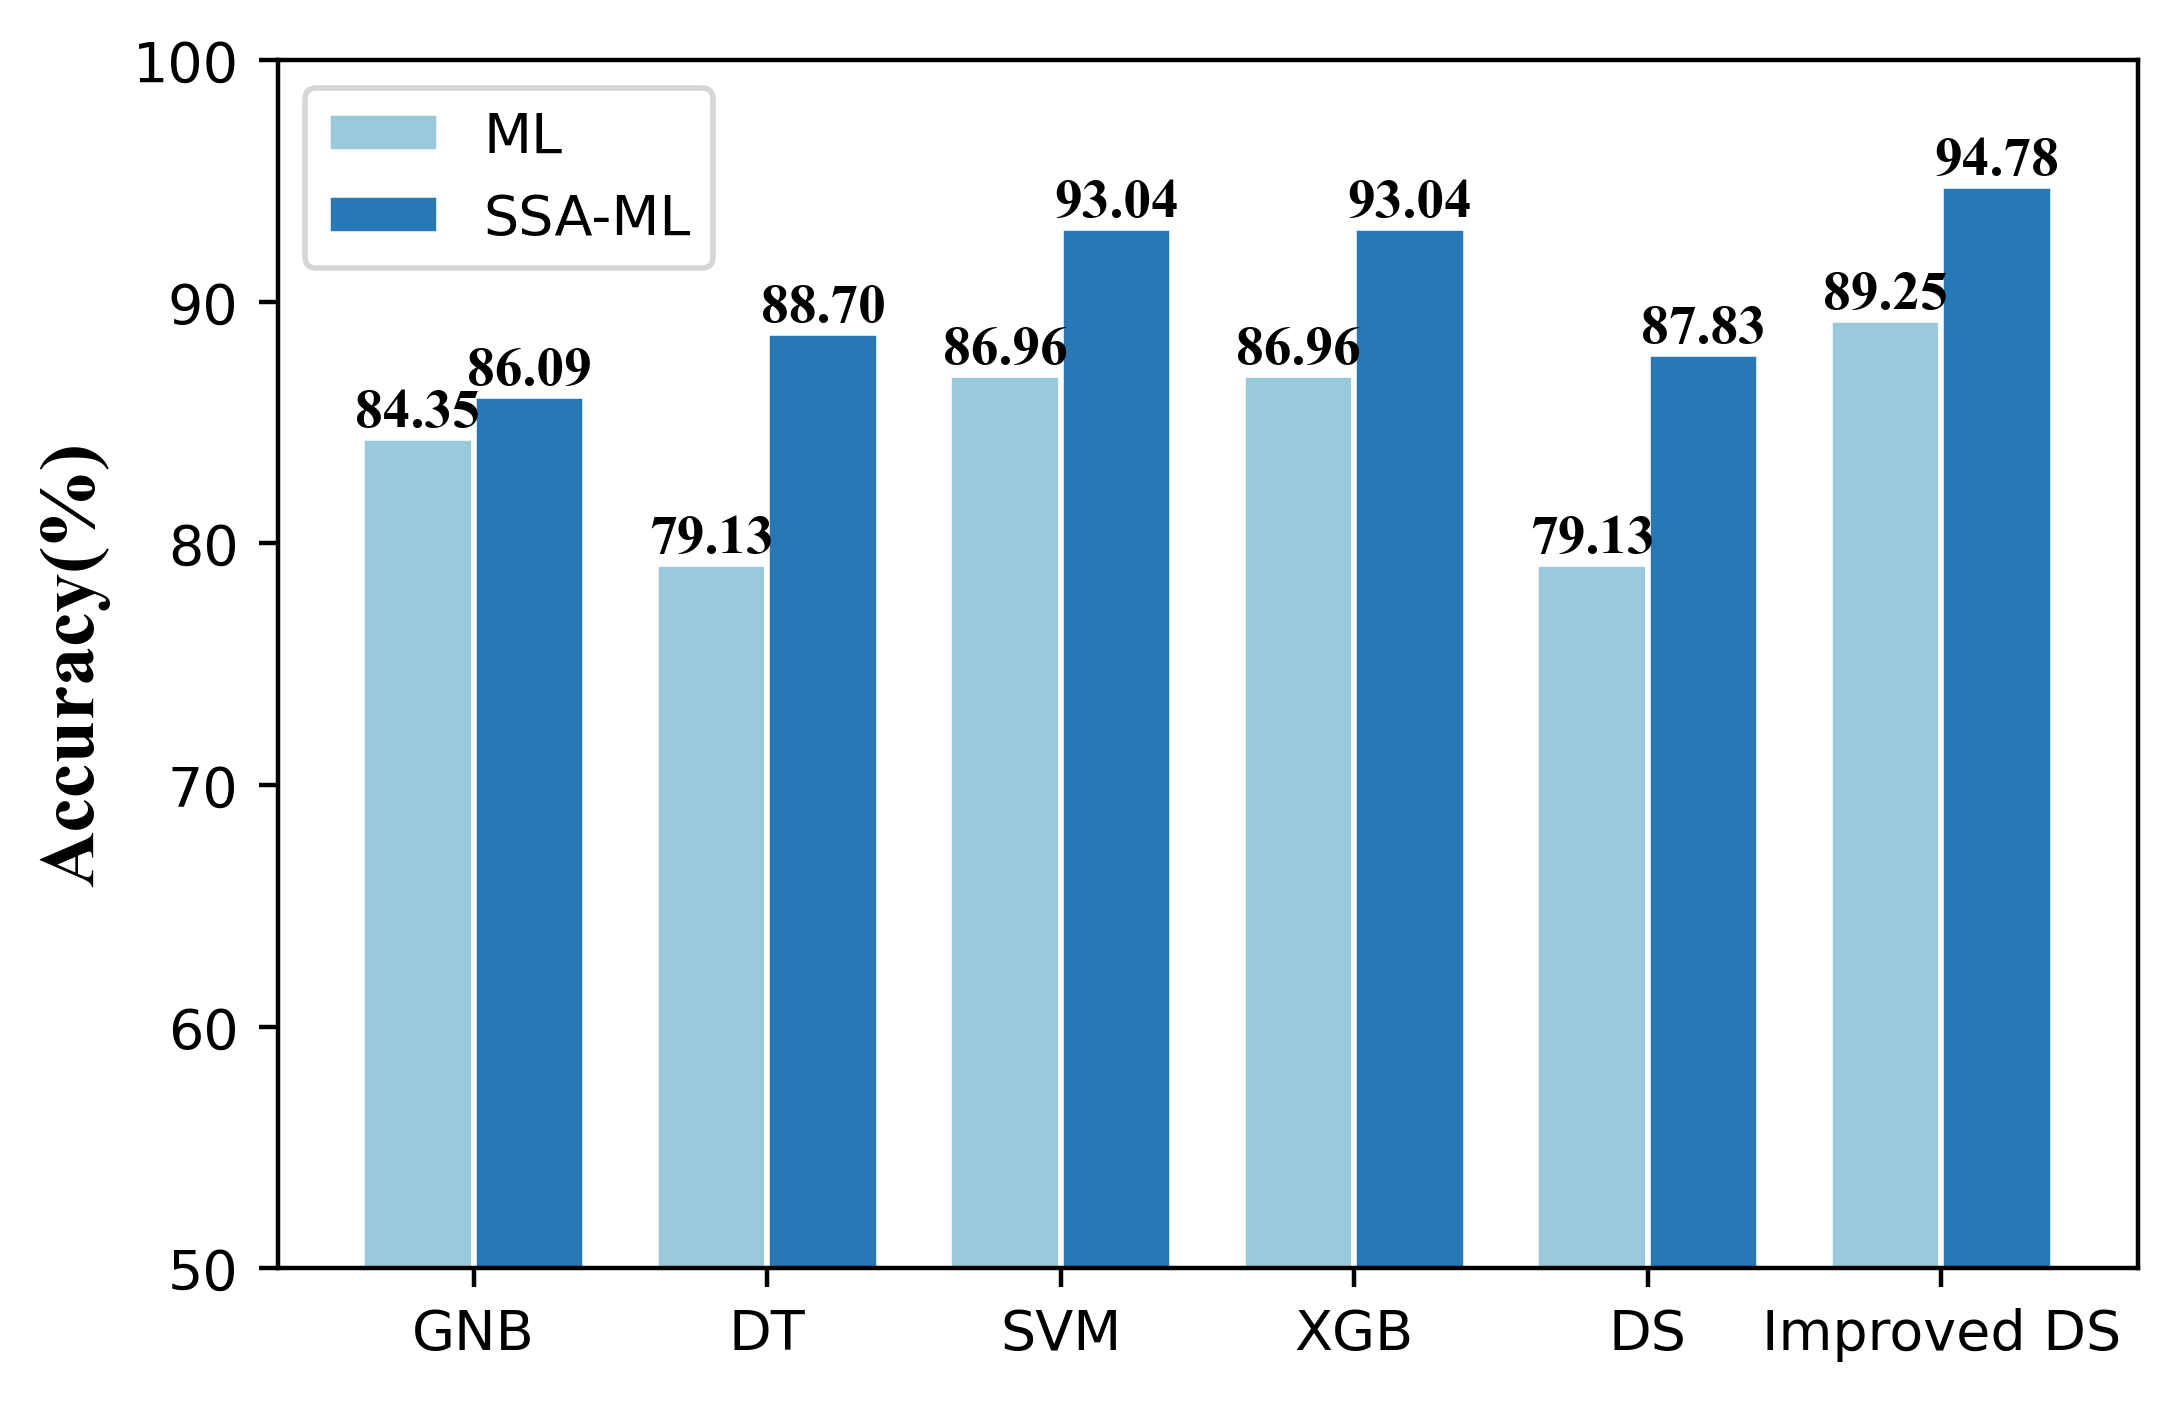

In [40]:
import matplotlib.pyplot as plt
import matplotlib
bars1 = np.array([84.35,79.13,86.96,86.96,79.13,89.25])
bars2 = np.array([86.09,88.70,93.04,93.04,87.83,94.78])
plt.figure(dpi=400)
labels = ["GNB", "DT", "SVM","XGB","DS","Improved DS"]
x = np.arange(len(labels)) 
barWidth = 0.38
x = np.arange(len(labels))  # x轴刻度标签位置
r1 = np.arange(len(bars1))

r2 = [x + barWidth for x in r1]

# 创建柱子
plt.bar(r1, bars1, width=barWidth, edgecolor='white',label = 'ML', color = '#9AC9DB')
plt.bar(r2, bars2, width=barWidth, edgecolor='white',label = 'SSA-ML', color =  '#2878B5')
plt.ylim(50,100)
plt.ylabel("Accuracy(%)",fontproperties="Times New Roman",fontsize=14,fontweight='bold');
# 添加x轴名称

plt.xticks([r + barWidth for r in range(len(bars1))], ["LR", "DT", "XGB","GB","DS","Improved DS"])
# 创建图例
font = {'family':'Times New Roman'  #'serif', 
#         ,'style':'italic'
        
#         ,'color':'red'
        ,'size':14
       }


#ax.set_xticklabels(labels,fontproperties='Times New Roman') 
#plt.yticks(fontproperties='Times New Roman')#设
plt.xticks(x+0.5*barWidth, labels=labels)

for a,b in zip(r1,bars1):   #柱子上的数字显示
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=10,fontweight='bold',fontproperties="Times New Roman");
for a,b in zip(r2,bars2):   #柱子上的数字显示
 plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=10,fontweight='bold',fontproperties="Times New Roman");
plt.legend(loc="upper left")

#plt.savefig("Fig.3(b).eps",bbox_inches = 'tight')
# 展示图片
plt.show()
